In [1]:
import sys
import os
import time
import numpy as np
source_path = os.path.join("source/")
sys.path.insert(0,source_path)
import quantum_jumps as qj
import random_linear_algebra
source_path = os.path.join("models/")
sys.path.insert(0,source_path)
import dissipative_quantum_east as dqe
from scipy import linalg
from matplotlib import pyplot
from matplotlib import cm

In [2]:
sites = 6
decay_rate = 1
field = 0.12
temperature = 0.0096
hardness = 1
model = dqe.master_operator(sites, decay_rate, field, temperature, hardness, False)

spin_z = 0.5*np.array([[1.0, 0.0], [0.0, -1.0]])
local_magnetization = dqe.local_operators(spin_z, sites)

In [3]:
smallest_step_size = 10**(-3)
evolver_number = 15
initial_time = time.time()
trajectory_generator = qj.jump_trajectory_generator(model, smallest_step_size, evolver_number)
print("Run time: " + str(time.time() - initial_time))

Run time: 0.08676862716674805


In [7]:
initial_state = np.zeros((2**sites), dtype = complex)
initial_state[0] = 1
initial_time = time.time()
trajectory = trajectory_generator.trajectory(initial_state, 100, 10**8, qj.expectations, local_magnetization)
print("Run time: " + str(time.time() - initial_time))

Progress: 0%
Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%
Progress: 100%
Run time: 125.26461696624756


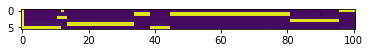

In [8]:
pyplot.imshow(trajectory.real.T)